In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
 


PATH_TO_DATA_TRAIN = "/kaggle/input/train-val-test-zoom/train_set_53/train_set_53/7"
PATH_TO_DATA_TEST = "/kaggle/input/train-val-test-zoom/test_set_11_final1/test_set_11_final1/7"
PATH_TO_DATA_VAL = "/kaggle/input/train-val-test-zoom/val_set_16_final1/val_set_16_final1/7"

 


 

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# try 32 ->  may go upto 81%, after 3 epoch 79.3%
batch_size_train =  32

batch_size_test = 1


train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=50,
    #validation_split = 0.2
    #validation_split = 0.1

    )



val_datagen = ImageDataGenerator(
    rescale=1./255
    #horizontal_flip=True,
    #vertical_flip=True,
    #rotation_range=50,
    #validation_split = 0.2
    #validation_split = 0.1

    )


train_generator =train_datagen.flow_from_directory(
    #dataframe=df,
    directory=PATH_TO_DATA_TRAIN,
    color_mode='rgb', 
    batch_size=batch_size_train, 
    seed=42,
    shuffle=True,
    class_mode="categorical",
    #subset="training", 
    target_size=(224,224))

validation_generator=val_datagen.flow_from_directory(
    #dataframe=df,
    directory=PATH_TO_DATA_VAL,
    color_mode='rgb', 
    batch_size=batch_size_test,
    seed=42,
    shuffle=False,
    class_mode="categorical",
    #subset="validation",
    target_size = (224, 224))

test_generator=val_datagen.flow_from_directory(
    #dataframe=df,
    directory=PATH_TO_DATA_TEST,
    color_mode='rgb', 
    batch_size=batch_size_test,
    seed=42,
    shuffle=False,
    class_mode="categorical",
    #subset="validation",
    target_size = (224, 224))




2024-05-15 16:32:43.790602: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-15 16:32:43.790691: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-15 16:32:43.950888: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 175838 images belonging to 5 classes.
Found 22235 images belonging to 5 classes.
Found 23776 images belonging to 5 classes.


In [4]:
#analyze how many in each class 
classes = ['CC', 'EC', 'LC', 'MC', 'SC'],
#y_true = validation_generator.classes

myv = validation_generator.classes;

bin_arr = np.bincount(myv)
print("validation", bin_arr)

myv1 = train_generator.classes;

bin_arr1 = np.bincount(myv1)
print("training", bin_arr1)

myv2 = test_generator.classes;

bin_arr2 = np.bincount(myv2)
print("test", bin_arr2)



#image_batch, label_batch = next(validation_generator)
#print(label_batch[2])
#y_CC = validation_generator.count('CC')

validation [9379 3336 1303 2314 5903]
training [45865 21481 14575 17242 76675]
test [5185 7907 1255 2856 6573]


In [5]:
#print(validation_generator.filenames)

#this is to check if the train set has any images from test set patient

#get a list of all the images in the train set
filenames=train_generator.filenames
results=pd.DataFrame({"Filename":filenames})
results.to_csv("ww42.3_results_train_8.csv",index=False)


#get a list of all the images in the validation set
filenames=validation_generator.filenames
results=pd.DataFrame({"Filename":filenames})
results.to_csv("ww42.3_results_val_8.csv",index=False)



In [6]:
import numpy as np

# Assuming train_generator.classes is an array of class labels
classes = np.unique(train_generator.classes)
class_counts = np.bincount(train_generator.classes)
total_samples = np.sum(class_counts)
class_weights = total_samples / (len(classes) * class_counts)

# Create a dictionary of class weights
class_weights_dict = dict(zip(classes, class_weights))

print(class_weights_dict)


{0: 0.7667633271557833, 1: 1.6371491085145011, 2: 2.4128713550600343, 3: 2.039647372694583, 4: 0.4586579719595696}


In [7]:
import matplotlib.pyplot as plt
import numpy as np

def data_visualisation(train_generator
                      ) -> None:
    """
    Plot 25 images from one batch
    
    train_generator: DirectoryIterator, a train generator that can be obtained from 
                     flow_from_directory in tensorflow.
    """
    image_batch, label_batch = next(train_generator)
    classes = np.asarray(list(train_generator.class_indices))
    #debug 
    #print(classes)
    
    plt.figure(figsize=(10,10))
    for n in range(25):
        plt.subplot(5,5,n+1)
        plt.imshow(image_batch[n])
        plt.title(classes[label_batch[n]==1])
        plt.axis('off')
    plt.show()
    plt.clf()
    plt.cla()
    plt.close()


def data_augment_visualisation(train_generator
                              ) -> None:
    """
    Plot 5 augmented version of the same image
    
    train_generator: DirectoryIterator, a train generator that can be obtained from 
                     flow_from_directory in tensorflow.
    """
    augmented_images = [train_generator[0][0][0] for i in range(5)]
    fig, axes = plt.subplots(1, 5, figsize=(10, 10))
    axes = axes.flatten()
    for img, ax in zip(augmented_images, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
    plt.clf()
    plt.cla()
    plt.close()

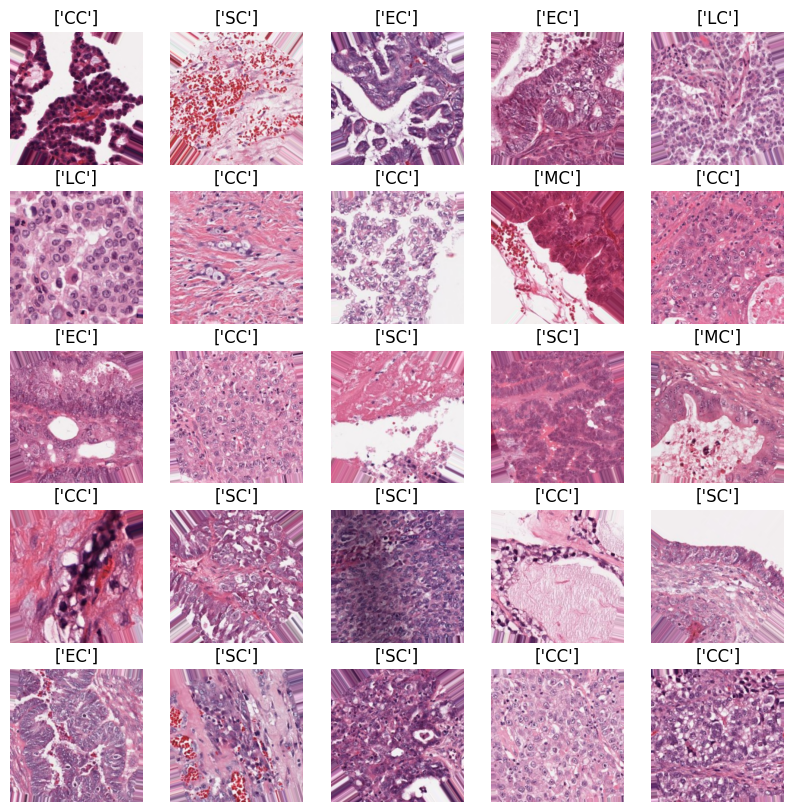

In [8]:
data_visualisation(train_generator)

In [9]:
#data_visualisation(validation_generator)

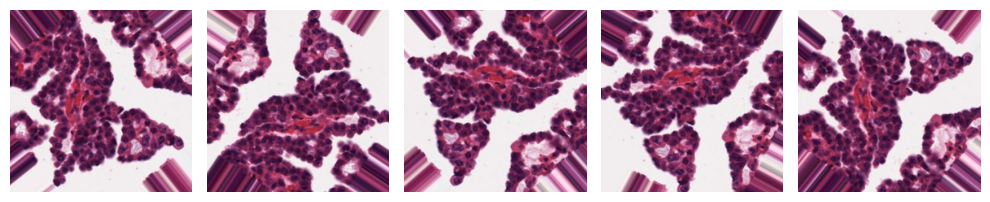

In [10]:
data_augment_visualisation(train_generator)

In [11]:
from tensorflow.keras.applications.vgg16 import VGG16
source_model = VGG16(include_top=False, weights='imagenet', input_shape=(224,224,3))

#from tensorflow.keras.applications.vgg19 import VGG19
#source_model = VGG19(include_top=False, weights='imagenet', input_shape=(224,224,3))


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [12]:
source_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Model

x = source_model.output

x = Flatten(name='flatten')(x)
#x = Dense(4096,activation='relu',
#x = Dense(1024,activation='relu',
#          kernel_regularizer=l2(1e-4),
#          name='fc6')(x)
#x = Dropout(0.5, name='drop6')(x)
#x = Dense(4096,activation='relu',
x = Dense(1024,activation='relu',
          kernel_regularizer=l2(1e-4),
          name='fc7')(x)
#x = Dropout(0.5, name='drop7')(x)

preds = Dense(5, activation='softmax', name='prob')(x)
# Final model: 
target_model = Model(inputs=source_model.input, outputs=preds)

In [14]:
# print final model
target_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc7 (Dense)                     │ (None, 1024)           │    25,691,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ prob (Dense)                    │ (None, 5)              │         5,125 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,410,949 (154.16 MB)

 Trainable params: 40,410,949 (154.16 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
from tensorflow.keras.optimizers import SGD

opti = SGD(learning_rate=1e-4, momentum=0.9)

target_model.compile(optimizer=opti,
                     loss='categorical_crossentropy', 
                     metrics=['accuracy'])

epochs = 8


In [16]:
print('step size:', train_generator.n//train_generator.batch_size)

step size: 5494


In [17]:
# in first epoch around 80% image, stop and run again, immediately 
# reach a high number upto =80% and build to 90% in next epoch
epochs = 1
import time

start_time = time.time()

history = target_model.fit(
    x=train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=epochs,
    class_weight=class_weights_dict  # Use the class_weights_dict instead of class_weights
)

time_elapsed = time.time() - start_time
print("Training complete in {:.0f}m {:.0f}s".format(time_elapsed // 60, time_elapsed % 60))


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1715791033.933815      94 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1715791033.956595      94 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


4333/5494 ━━━━━━━━━━━━━━━━━━━━ 9:31 492ms/step - accuracy: 0.6797 - loss: 0.9259

W0000 00:00:1715793243.026303      96 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


5494/5494 ━━━━━━━━━━━━━━━━━━━━ 2912s 515ms/step - accuracy: 0.7029 - loss: 0.8713
Training complete in 48m 33s


In [18]:
epochs = 4
#epochs = 8
# Image 7 
#epochs = 6 

# in first epoch around 80% image, stop and run again, immediately 
# reach a high number upto =80% and build to 90% in next epoch
import time

start_time = time.time()


history = target_model.fit(x=train_generator,
                           steps_per_epoch=train_generator.samples // train_generator.batch_size, 
                           epochs=epochs, 
                           class_weight=class_weights_dict  # Use the class_weights_dict instead of class_weights
)

time_elapsed = time.time() - start_time
print("Training complete in {:.0f}m {:.0f}s".format(time_elapsed // 60, time_elapsed % 60))

Epoch 1/4
5494/5494 ━━━━━━━━━━━━━━━━━━━━ 2345s 426ms/step - accuracy: 0.8903 - loss: 0.4386
Epoch 2/4
5494/5494 ━━━━━━━━━━━━━━━━━━━━ 0s 3us/step - accuracy: 0.9062 - loss: 0.3625     
Epoch 3/4


/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


5494/5494 ━━━━━━━━━━━━━━━━━━━━ 2369s 431ms/step - accuracy: 0.9229 - loss: 0.3633
Epoch 4/4
5494/5494 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step - accuracy: 0.9688 - loss: 0.2529     
Training complete in 78m 36s


In [19]:
import matplotlib.pyplot as plt

def history_plot(history
                ) -> None:
    """
    Plot the history of the accuracies and losses at each epoch
    
    history: history of the training (this is the output of the function 'fit')
    """
    epochs_range = range(len(history.history['loss']))
    fig = plt.figure(figsize=(8, 8))
    
    # plot of accuracy
    ax = fig.add_subplot(1, 2, 1)
    acc = history.history['accuracy']
    ax.plot(epochs_range, acc)
    
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training Accuracy')
    
    # plot of loss
    ax = fig.add_subplot(1, 2, 2)
    loss = history.history['loss']
    ax.plot(epochs_range, loss)
    
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training Loss')
    
    plt.show()
    plt.clf()
    plt.cla()
    plt.close()

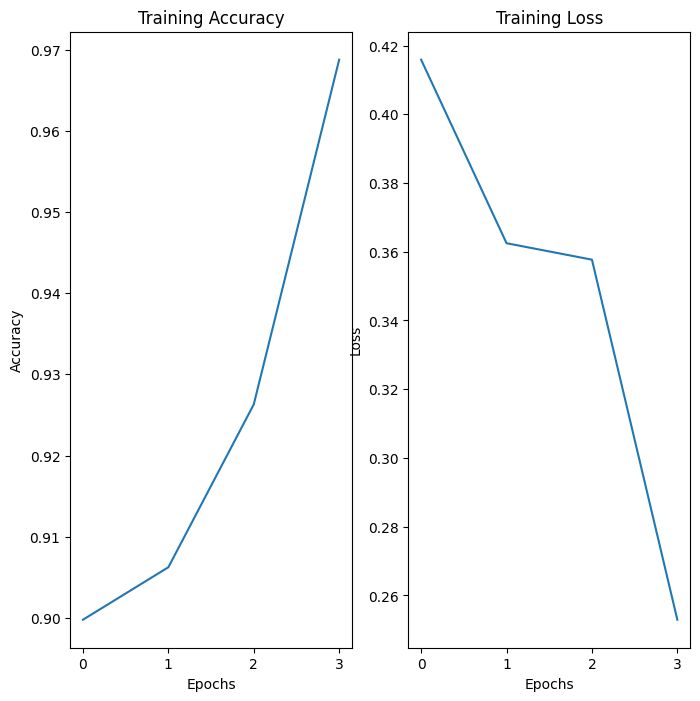

In [20]:
history_plot(history)

In [21]:
#eva = target_model.evaluate(x = validation_generator,
#                            steps = validation_generator.samples )

eva = target_model.evaluate(x = validation_generator,
                            steps = validation_generator.samples // validation_generator.batch_size)


22235/22235 ━━━━━━━━━━━━━━━━━━━━ 224s 10ms/step - accuracy: 0.9681 - loss: 0.2915


In [22]:
#eva = target_model.evaluate(x = validation_generator,
#                            steps = validation_generator.samples )

eva = target_model.evaluate(x = test_generator,
                            steps = test_generator.samples // validation_generator.batch_size)


23776/23776 ━━━━━━━━━━━━━━━━━━━━ 235s 10ms/step - accuracy: 0.9746 - loss: 0.2795


In [23]:
#print(eva)

In [24]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
from typing import List
import numpy as np
import pandas.testing as tm

def plot_confusion_mat(y_true: np.ndarray, 
                       y_pred: np.ndarray, 
                       classes: List[str] = ['CC', 'EC', 'LC', 'MC', 'SC'], 
                       title: str = "normal"
                      ) -> None:
    """
    Plot the confusion matrix using confusion_matrix function from scikit-learn
    
    y_true: true labels, number between 0 to (number of classes-1)
    y_pred: predicted labels, number between 0 to (number of classes-1)
    classes: list of the name of all the classes
    title: name of the experiment
    """
    cm = confusion_matrix(y_true, y_pred)
    df_cm = pd.DataFrame(cm,
                         index=[i for i in classes],
                         columns=[i for i in classes])
    plt.figure(figsize=(10, 7))
    sn.heatmap(df_cm, annot=True, vmin=0, vmax=400, fmt=".0f", annot_kws={'size': 13}, square=True)
    plt.title("Confusion matrix: "+title)
    plt.show()
    plt.clf()
    plt.cla()
    plt.close()

In [25]:
from sklearn.metrics import classification_report
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, roc_auc_score
from typing import List
import numpy as np

def plot_AUC_ROC(y_true: np.ndarray, 
                 predictions: np.ndarray, 
                 classes: List[str] = ['CC', 'EC', 'LC', 'MC', 'SC'], 
                 title: str = "normal"
                ) -> None:
    """
    Plot the AUC-ROC Curve for multiple-classes
    
    y_true: true labels, number between 0 to (number of classes-1)
    predictions: prediction probability for all classes
    classes: list of the name of all the classes
    title: name of the experiment
    """
    num_classes = len(classes)
    
    #debug 
    #print(num_classes)
    y_true = label_binarize(y_true, classes=list(range(num_classes)))
    for c in range(len(classes)):
        
        #debug 
        #print(c)
        auc_roc = roc_auc_score(y_true[:, c], predictions[:, c])
        #label = classes[c] + " AUC: %.3f " % auc_roc
        label =  classes[c] +  " AUC: %.3f" % auc_roc
        
        #debug
        #print(label)

        a, b, _ = roc_curve(y_true[:, c], predictions[:, c])
        plt.figure(1, figsize=(7, 7))
        plt.plot([0, 1], [0, 1], 'k--')
        plt.plot(a, b, label=label)
        plt.xlabel("False positive rate")
        plt.ylabel("True positive rate")
        plt.legend(loc="lower right")
    plt.title("AUC-ROC Curve: "+title)
    plt.show()
    plt.clf()
    plt.cla()
    plt.close()

In [26]:

#results per (test) train data
classes = ['CC', 'EC', 'LC', 'MC', 'SC'],
test_generator.reset()
y_true = test_generator.classes

test_generator.reset()
predictions = target_model.predict(x = test_generator, 
                                   steps = test_generator.samples // validation_generator.batch_size)
#print(predictions)
y_pred = np.argmax(predictions, axis=1)

#should comment this
local_labels = (test_generator.class_indices)
local_labels = dict((v,k) for k,v in local_labels.items())
loc_predictions = [local_labels[k] for k in y_pred]

y_true_test = y_true
y_pred_test = y_pred

#should comment this
filenames=test_generator.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":loc_predictions})
results.to_csv("ww42.3_results_test_7_1.csv",index=False)


23776/23776 ━━━━━━━━━━━━━━━━━━━━ 205s 9ms/step


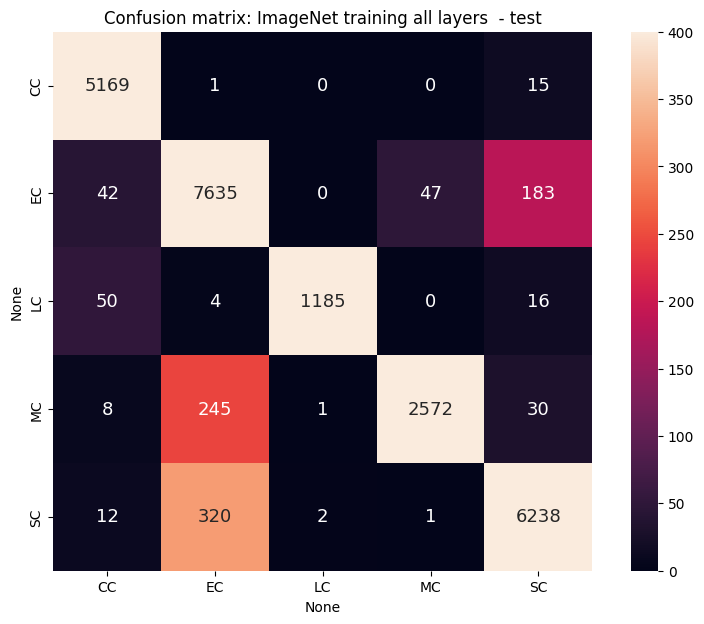

(['CC', 'EC', 'LC', 'MC', 'SC'],)


In [27]:
import matplotlib.pyplot as plt
import numpy as np

plot_confusion_mat(y_true, y_pred, classes, "ImageNet training all layers  - test")
print(classes)

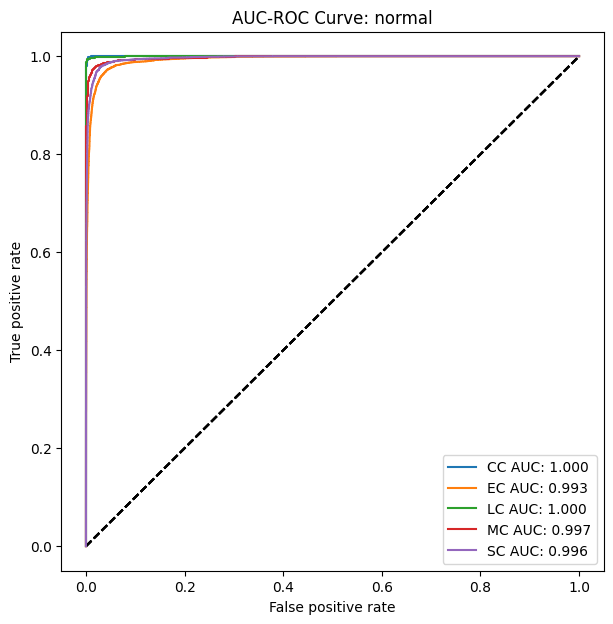

In [28]:
classes = ['CC', 'EC', 'LC', 'MC', 'SC']
plot_AUC_ROC(y_true, predictions, classes, "normal")

In [29]:
#results per (test) train data
classes = ['CC', 'EC', 'LC', 'MC', 'SC'],
validation_generator.reset()
y_true = validation_generator.classes

validation_generator.reset()
predictions = target_model.predict(x = validation_generator, 
                                   steps = validation_generator.samples // validation_generator.batch_size)
#print(predictions)
y_pred = np.argmax(predictions, axis=1)

#should comment this
local_labels = (validation_generator.class_indices)
local_labels = dict((v,k) for k,v in local_labels.items())
loc_predictions = [local_labels[k] for k in y_pred]

#should comment this
filenames=validation_generator.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":loc_predictions})
results.to_csv("ww42.3results_val_test_7_1.csv",index=False)


22235/22235 ━━━━━━━━━━━━━━━━━━━━ 191s 9ms/step


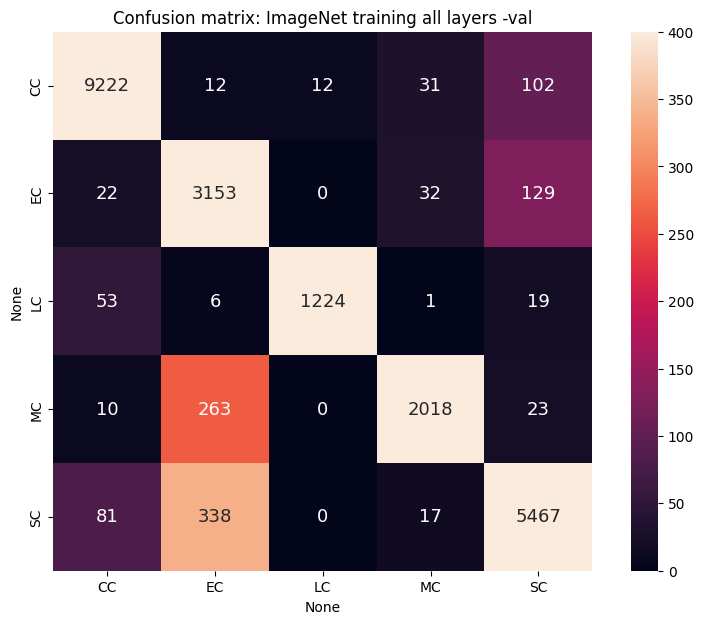

(['CC', 'EC', 'LC', 'MC', 'SC'],)


In [30]:
import matplotlib.pyplot as plt
import numpy as np

plot_confusion_mat(y_true, y_pred, classes, "ImageNet training all layers -val")
print(classes)

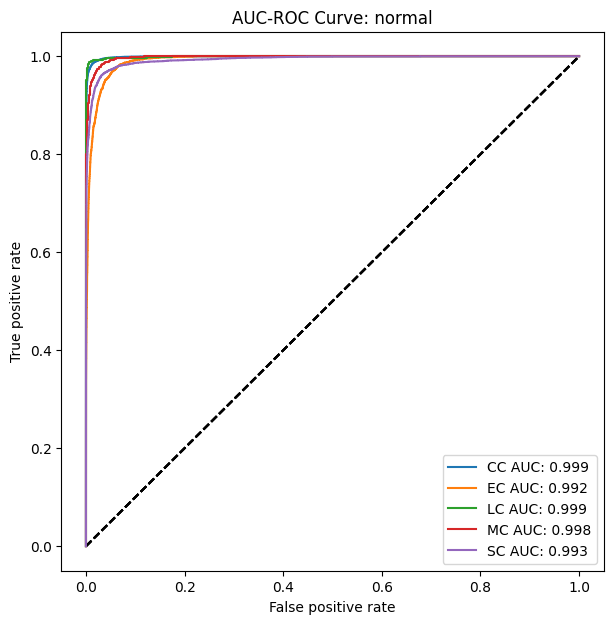

In [31]:
classes = ['CC', 'EC', 'LC', 'MC', 'SC']
plot_AUC_ROC(y_true, predictions, classes, "normal")

In [32]:
target_model.save('/kaggle/working/target_model_v1.ww42.3_vgg16_32b_72-train_val_test-7_1.h5')

In [33]:
from sklearn.metrics import classification_report

classes = ['CC', 'EC', 'LC', 'MC', 'SC']

# Calculate classification report
report = classification_report(y_true_test, y_pred_test, labels=np.unique(y_true_test), target_names=classes)

# Display the classification report
print(report)

# If you want to extract individual metrics programmatically:
from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1_score, support = precision_recall_fscore_support(y_true_test, y_pred_test)

# Extracting metrics for each class
class_metrics = {}
for i, class_name in enumerate(classes):
    class_metrics[class_name] = {
        "Precision": precision[i],
        "Recall": recall[i],
        "F1 Score": f1_score[i],
        "Support": support[i]
    }

# Print metrics for each class
for class_name, metrics in class_metrics.items():
    print(f"Metrics for {class_name}:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value}")


              precision    recall  f1-score   support

          CC       0.98      1.00      0.99      5185
          EC       0.93      0.97      0.95      7907
          LC       1.00      0.94      0.97      1255
          MC       0.98      0.90      0.94      2856
          SC       0.96      0.95      0.96      6573

    accuracy                           0.96     23776
   macro avg       0.97      0.95      0.96     23776
weighted avg       0.96      0.96      0.96     23776

Metrics for CC:
Precision: 0.978791895474342
Recall: 0.996914175506268
F1 Score: 0.9877699216510606
Support: 5185
Metrics for EC:
Precision: 0.9305301645338209
Recall: 0.965600101176173
F1 Score: 0.9477408142999006
Support: 7907
Metrics for LC:
Precision: 0.9974747474747475
Recall: 0.9442231075697212
F1 Score: 0.9701187065083914
Support: 1255
Metrics for MC:
Precision: 0.981679389312977
Recall: 0.9005602240896359
F1 Score: 0.939371804236669
Support: 2856
Metrics for SC:
Precision: 0.9623572971305153
Recall